##### 全域變數、區域變數
一個變數的名稱除了可以代表不同的東西，也表示「哪裡可以使用」這個變數，這篇教學將會介紹全域變數和區域變數的用法和差異。

##### 什麼是全域變數和區域變數？ 
在 Python 裡的主程式與每個函式，都有各自的名稱空間 ( namespace )，簡單的區分規則如下：
* 主程式定義「全域」的名稱空間，在主程式定義的變數是「全域變數」。
* 個別函式定義「區域」的名稱空間，個別函式裡定義的變數就是「區域變數」。
* 每個名稱空間裡的變數名稱都是「唯一的」。
* 不同名稱空間內的變數名稱可以相同，例如函式 A 可以定義 a 變數，函式 B 也可以定義 a 變數，兩個 a 變數是完全不同的變數。

例如有個人叫做小華，在一個家庭裡只會有一個小華，而不同的家庭可以有不同的小華 ( 不同的人，但是都叫做小華 )，不過如果這群小華去到學校，\
就必須要額外命名，才知道哪個小華是小華 ( 一間學校只會有一個小華，其他的可能是小華一號、小華二號...等 )

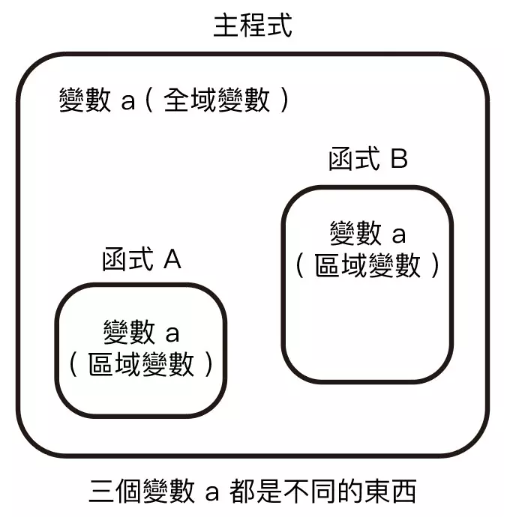

##### 預設的名稱空間 
Python 預設提供三個名稱空間，分別是內置預設 Built-in ( Python 預設的函數名稱如 abs、char...等等 )、全域 Global 和區域 Local 三種，\
當使用變數時，會從最內層 ( 區域命名空間 ) 開始往外層搜尋，直到找到對應的名稱為止 ( 如果找不到就會拋出錯誤 )。

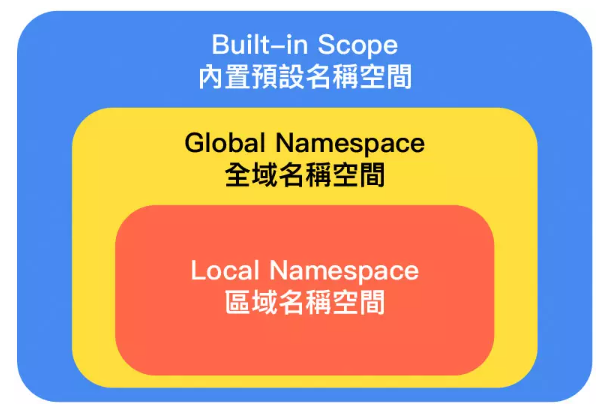

##### 釐清到底用了哪個變數 
下方的程式碼，定義了兩個變數 a，因為兩個變數 a 處在不同的名稱空間裡，所以印出來的結果是不同的。

* 注意，函式名稱也屬於變數名稱，如果將函式定義為 a，則會覆寫全域變數 a 的內容。

In [ ]:
a = 1           # 定義全域變數 a 等於 1
def hello():    # 定義 hello 函式
  a = 2         # 定義區域變數 a 等於 2
  print(a)

hello()         # 2
print(a)        # 1

如果在 hello 函式裡沒有定義變數 a，而是「單純使用變數 a」，這時程式會先尋找 hello 函式的名稱空間裡是否有變數 a，\
如果找不到，就會往外層尋找，找到之後就會使用該變數的內容，以下方的例子，執行 hello 函式後就會印出 10。

In [ ]:
a = 1
def hello():
  print(a+9)    # 使用全域變數的 a

hello()         # 10
print(a)        # 1

如果移除全域變數 a，執行過程最後就會發生錯誤，因為最後一個 print(a) 是尋找全域變數 a，因為找不到所以就會發生錯誤。

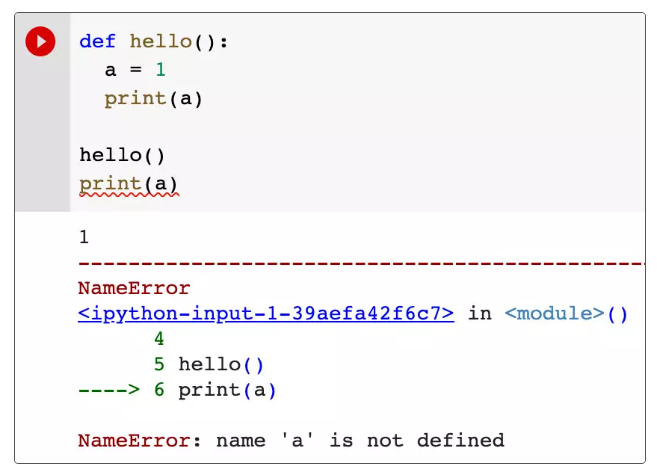

In [ ]:
def hello():
  a = 1
  print(a)

hello()
print(a)    # 發生錯誤，因為找不到變數 a

同樣的道理，如果是不同函式，如果要互相呼叫對方的變數，也會發生錯誤。

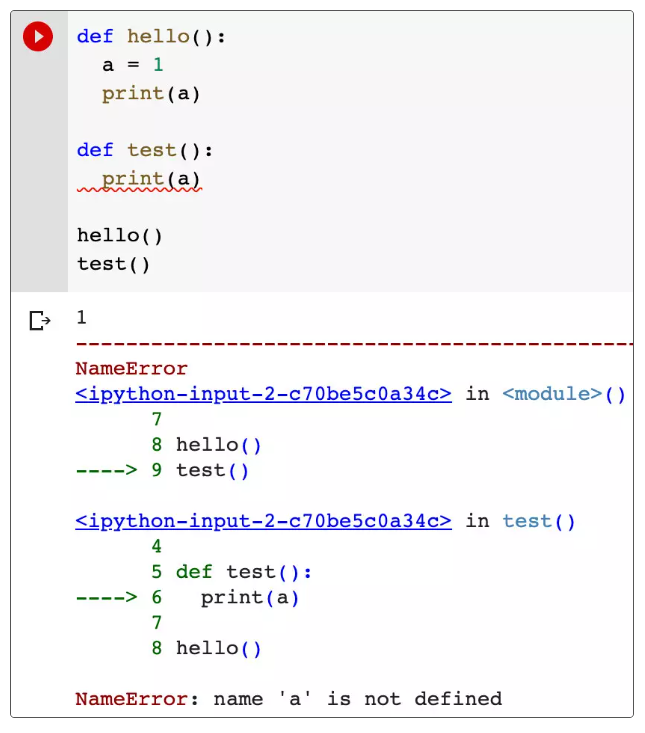

In [ ]:
def hello():
  a = 1
  print(a)

def test():
  print(a)

hello()
test()    # 發生錯誤，因為找不到變數 a

##### 使用 global 修改全域變數 
如果要在函式裡修改全域變數，可以使用「global 全域變數」的方式。

In [ ]:
a = 1         # 定義全域變數 a 等於 1
def hello():  # 定義 hello 函式
  global a    # 聲明下方的 a 為全域變數 a
  a = 2       # 修改 a 為 2

print(a)      # 1
hello()       # 執行 hello 函式
print(a)      # 2 ( 全域變數 a 被修改為 2 )

##### 全域變數和區域變數容易遇到的陷阱 
如果變數的內容是串列、字典或集合，在處理「全域變數和區域變數」時，與處理「多個變數同時賦值」時一樣，\
很容易會遇到賦值的陷阱，因為變數只是「標籤」，當多個變數同時指向一個串列、字典或集合時，\
只要變數內容被修改 ( 並非使用等號賦值 )，不論這個變數是全域還是區域變數，\
另外一個變數內容也會跟著更動 ( 延伸閱讀：[設定多個變數的陷阱](https://steam.oxxostudio.tw/category/python/basic/variable.html#a6) )。

下方的例子執行後，f1 函式的 a 不受作用域的影響，使用 append 發生「改變」後，不論 a 在何處都會被影響，連帶 b 也被影響，\
但 c 因為是使用等號「宣告賦值」，就會轉變成「區域變數」，因此在 f1 函式作用域之外的 c 就不會被影響，d 也不會被影響，\
不過如果在 f1 的開頭加上 global c，等同於將 c 從區域變數提升到全域變數，f2 裡的 c 就會被影響。

In [ ]:
a = []
b = a
c = []
d = c

def f1():
    # global c        # 如果加上這行，f2 裡的 c 就會被影響
    a.append(1)
    c = [1]
    print(a)  # [1]
    print(b)  # [1]   # 被影響
    print(c)  # [1]
    print(d)  # []    # 不受影響

def f2():
    print(a)  # [1]   # 被影響
    print(b)  # [1]   # 被影響
    print(c)  # []    # 不受影響，但如果 f1 加上 global c，此處就會被影響
    print(d)  # []    # 不受影響

f1()
f2()

##### global() 和 local() 
global() 和 local() 是兩個可以印出目前變數的方法：
* global()：回傳一個字典，內容是「全域名稱空間」的內容。
* local()：回傳一個字典，內容是「區域名稱空間」的內容。

下方的程式碼，執行 hello 函式後會印出區域名稱空間和全域名稱空間的內容。

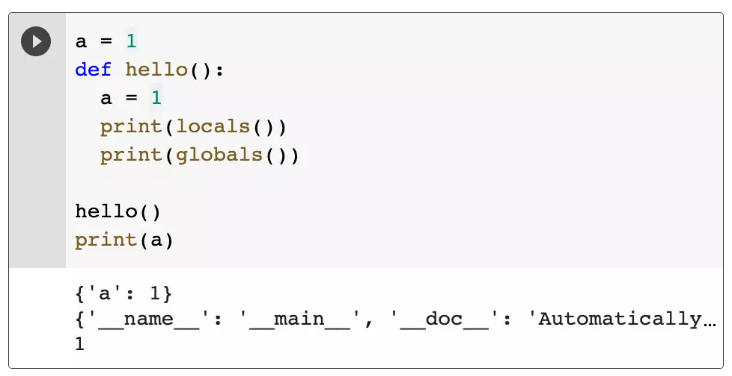

In [ ]:
a = 1
def hello():
  a = 1
  print(locals())
  print(globals())

hello()
print(a)

如果將 locals() 放到全域名稱空間裡，則印出來的結果和 global() 相同。

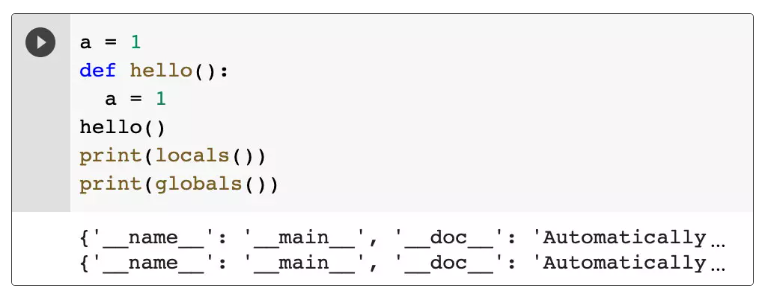

In [ ]:
a = 1
def hello():
  a = 1
hello()
print(locals())
print(globals())